In [1]:
import matplotlib.pyplot as plt
import os
from glob import glob
import numpy as np
from scipy.signal import find_peaks

In [2]:
def read_data(path:str) -> tuple:
    wavenumbers = []
    values = []
    with open(path) as f:
        for line in f.readlines():
            wave, value = line.rstrip('\n').split('\t')
            wavenumbers.append(float(wave))
            values.append(float(value))
    return wavenumbers, values

def plot(path:str) -> None:
    wavenumbers, values = read_data(path)
    wavenumbers = np.array(wavenumbers)
    values = np.array(values)
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,9))
    ax.plot(wavenumbers, values)
    ax.grid()
    filename = os.path.split(path)[1]
    ax.set_title(f"A Raman Spectroscopy of {filename}")
    ax.set_xlabel(f"wavenumber (cm^-1)")
    ax.set_ylabel(f"Intensity")

    peak_idxs, _ = find_peaks(values, distance=100, height=values.mean())
    for idxs in peak_idxs:
        x:float = wavenumbers[idxs] # type: ignore
        y:float = values[idxs] # type: ignore
        ax.axvline(x, color='black', linestyle='--', alpha=0.5)
        ax.text(x, y + 1, f'{x}')

    plt.show()

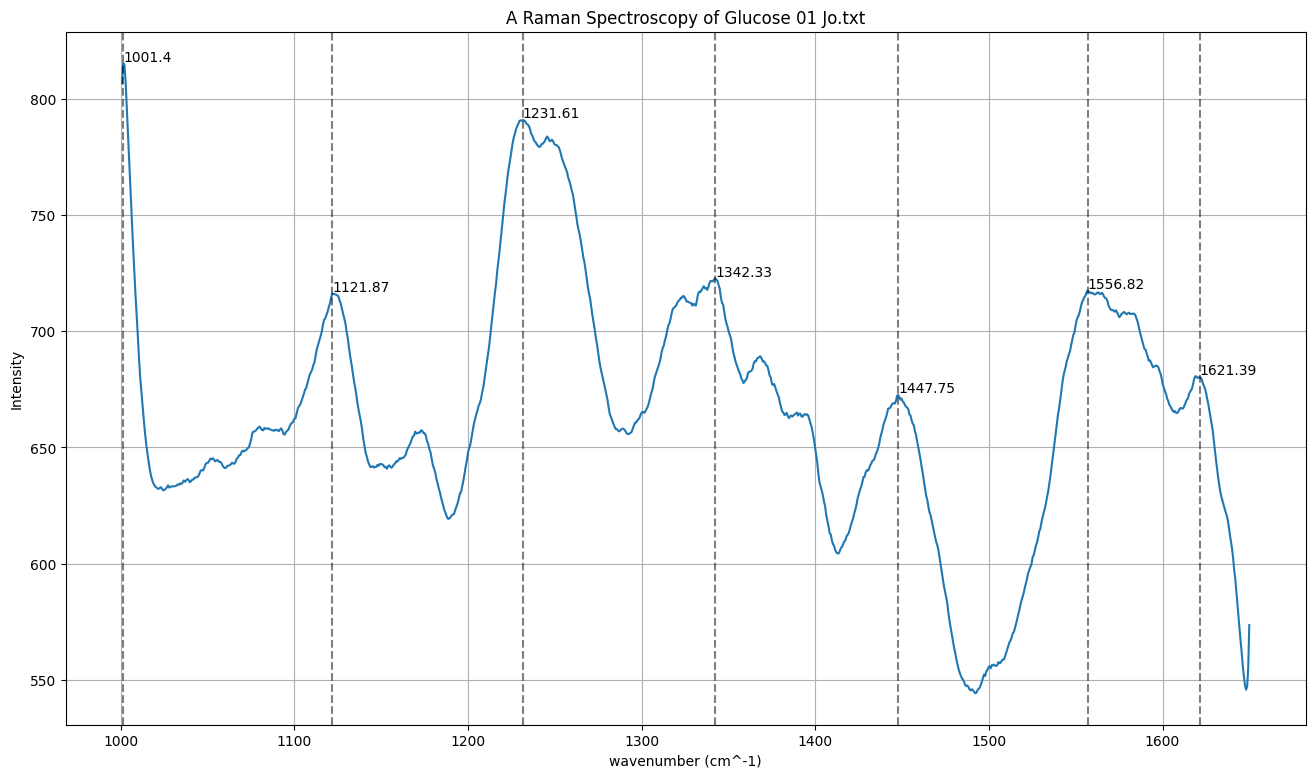

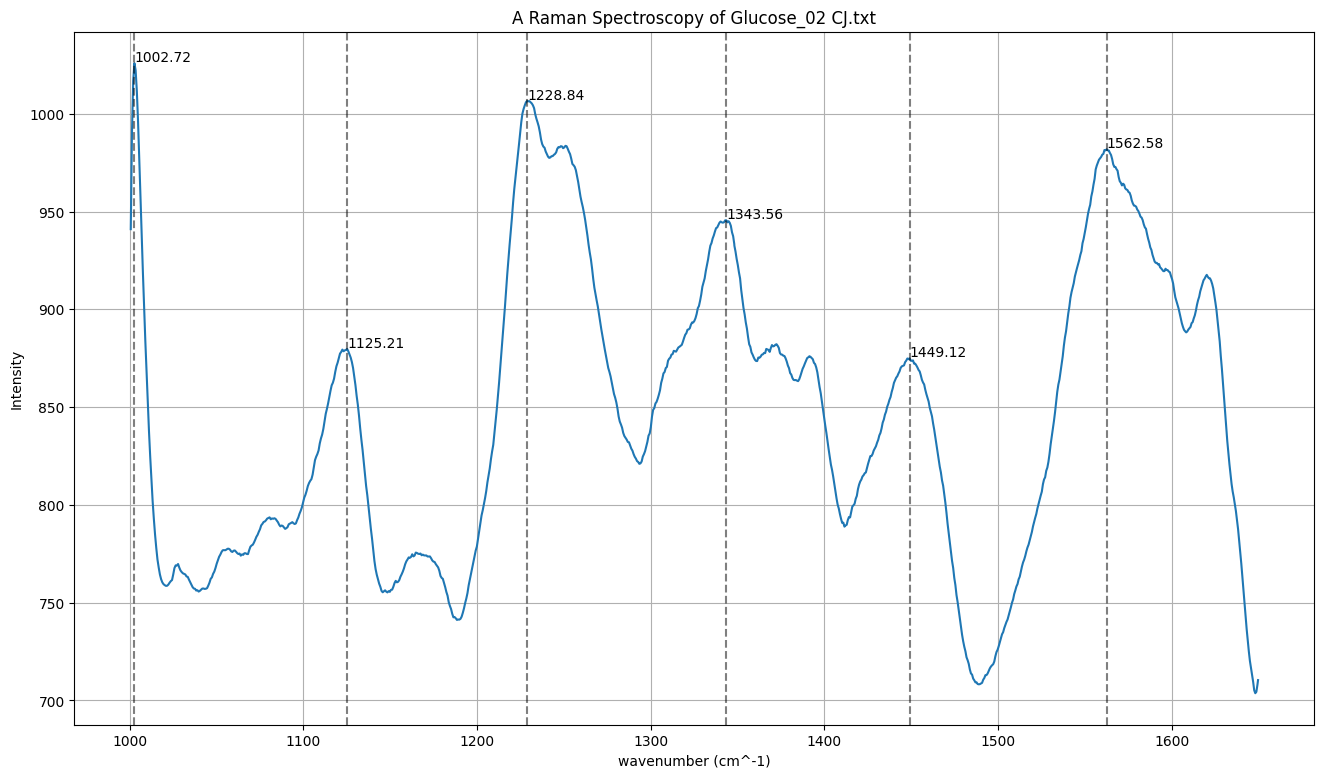

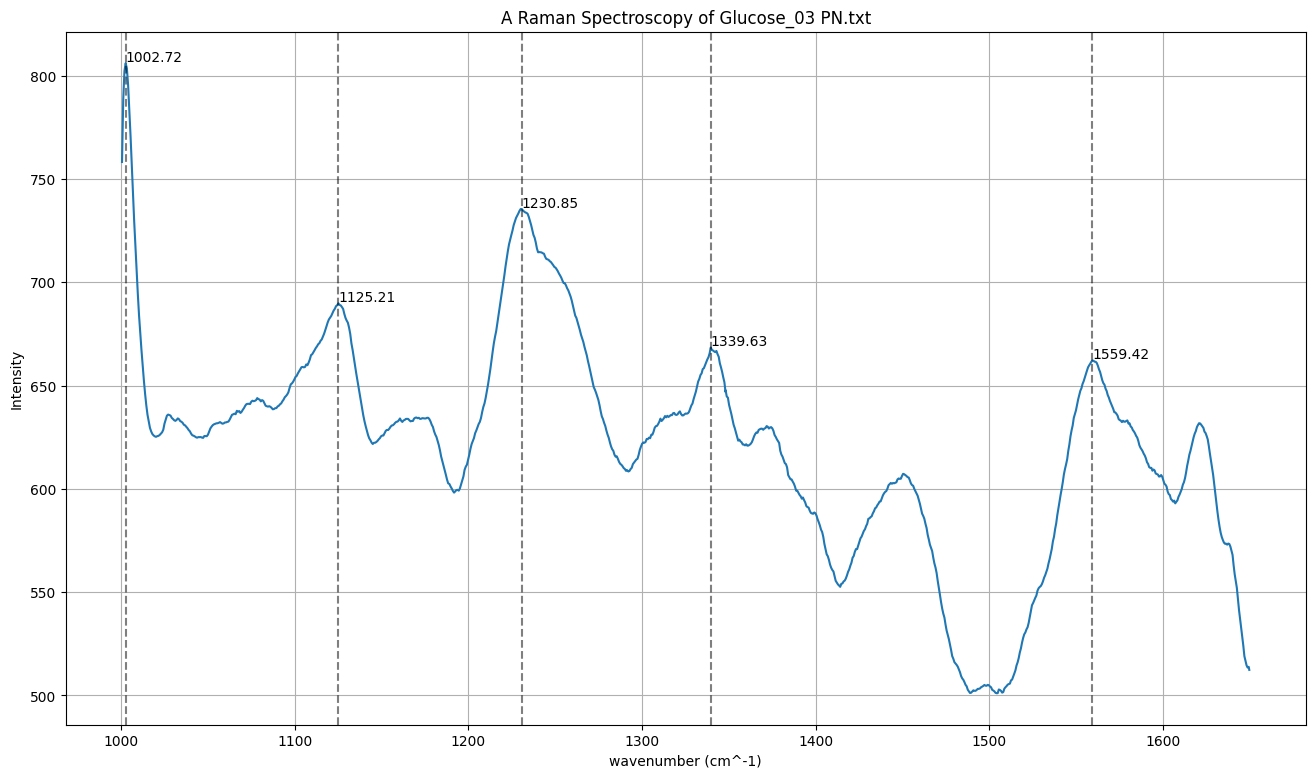

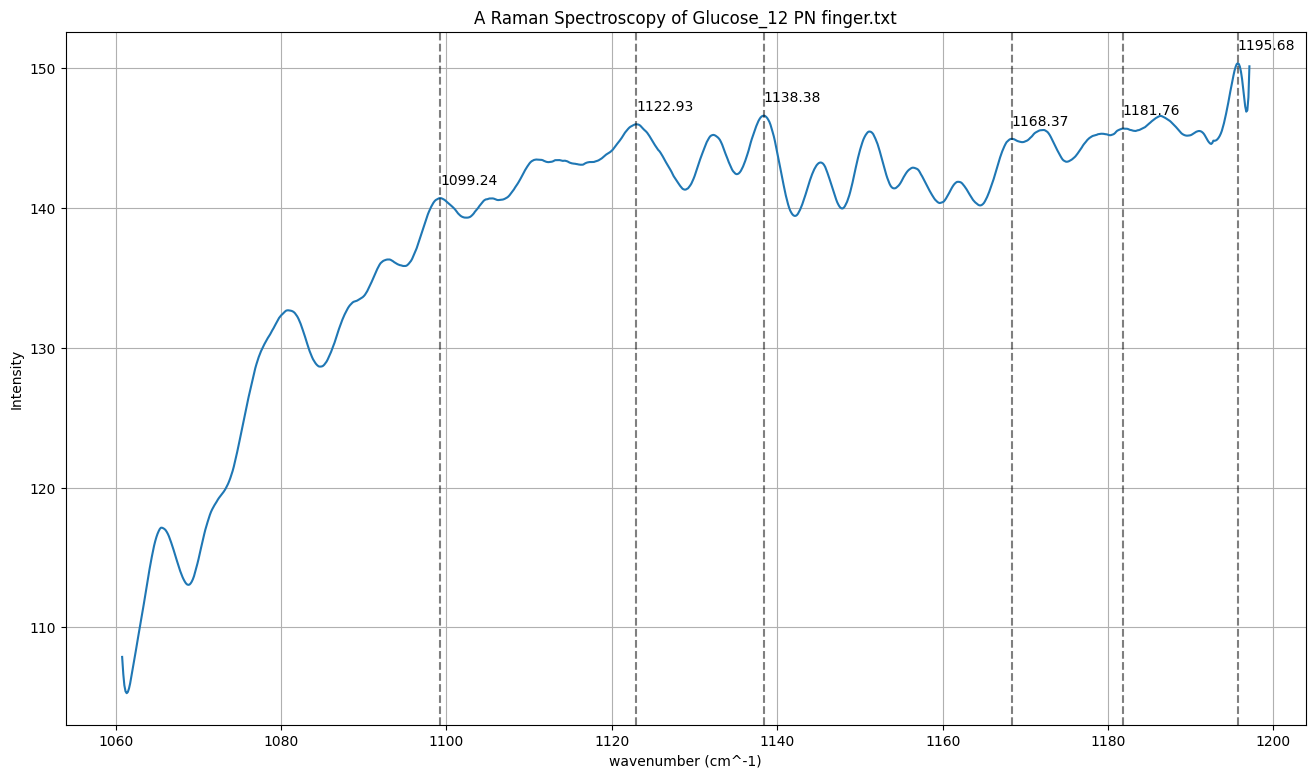

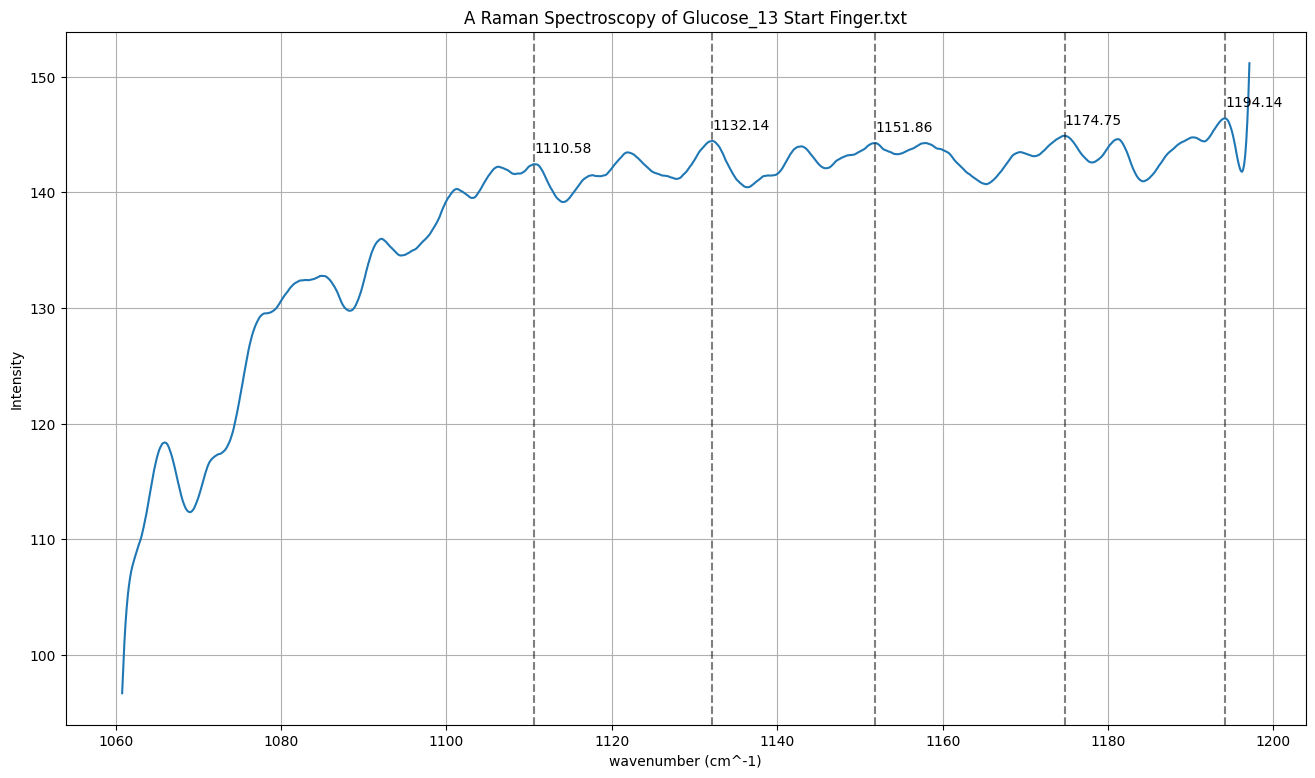

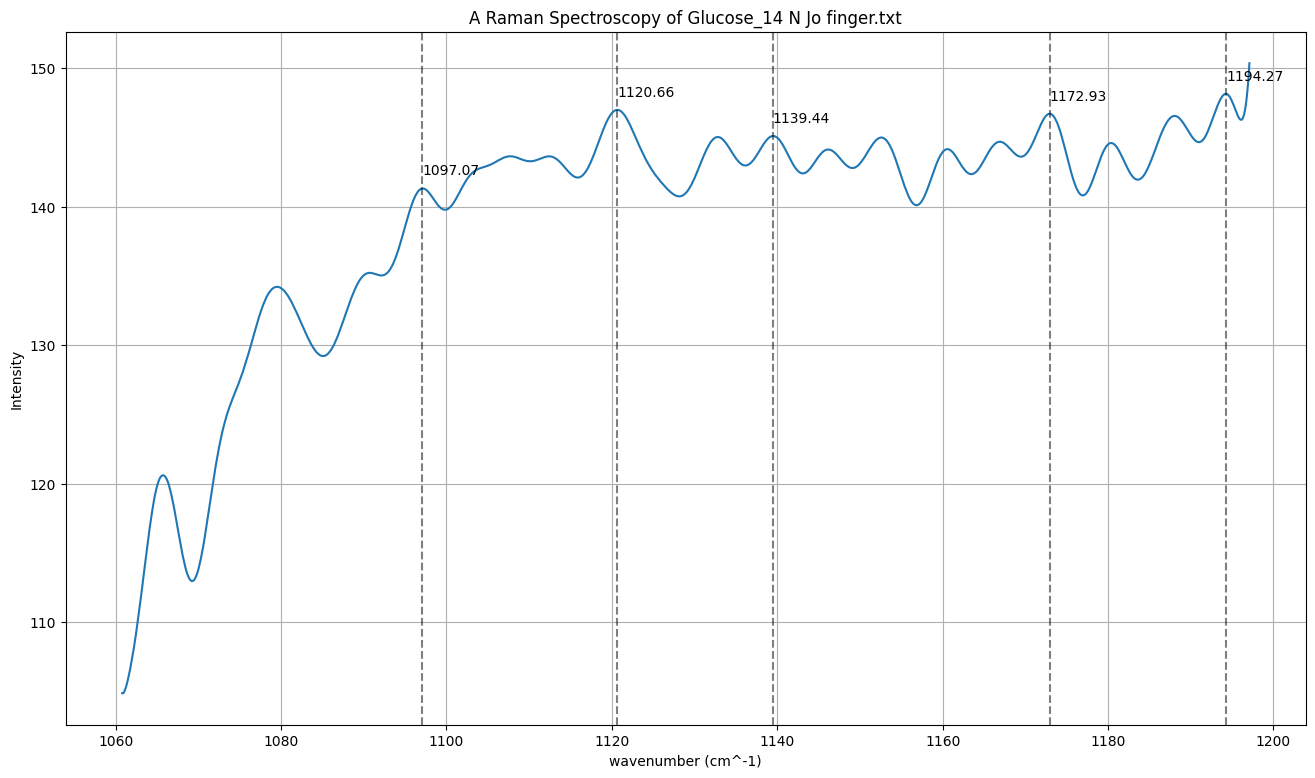

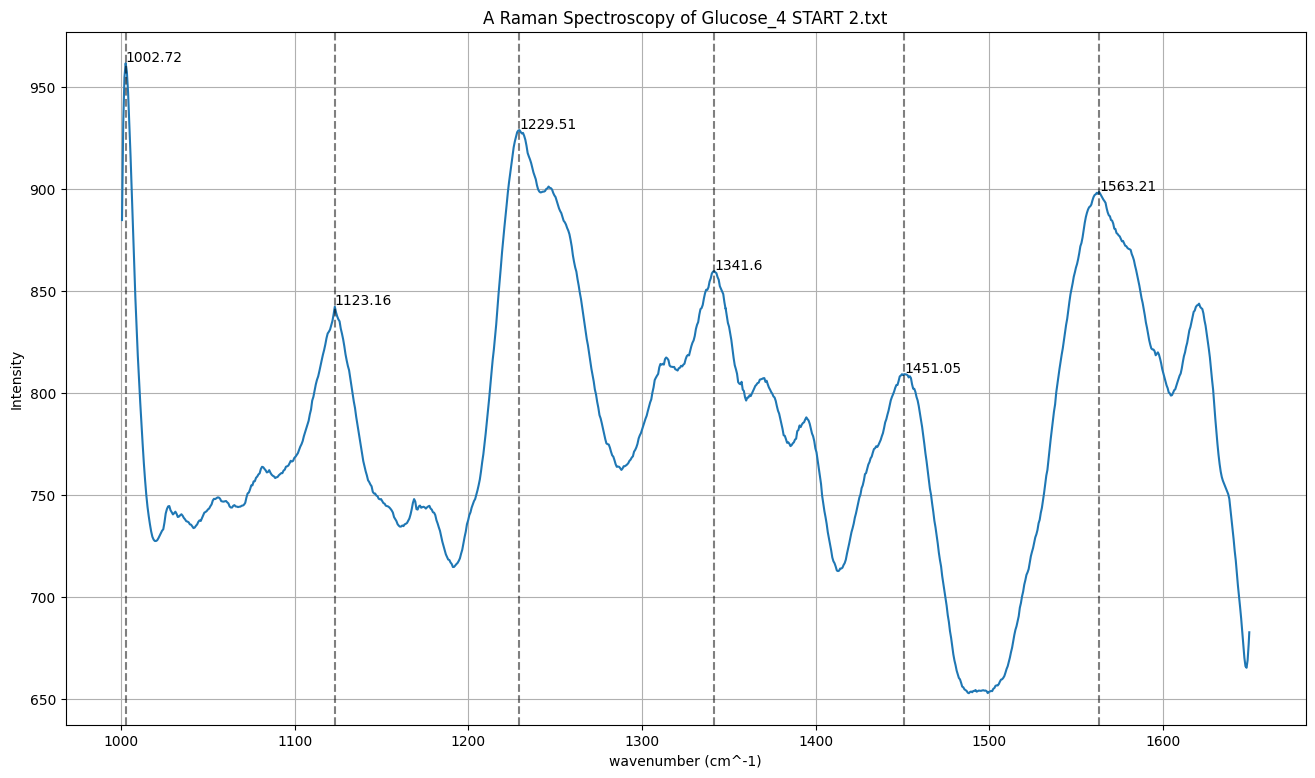

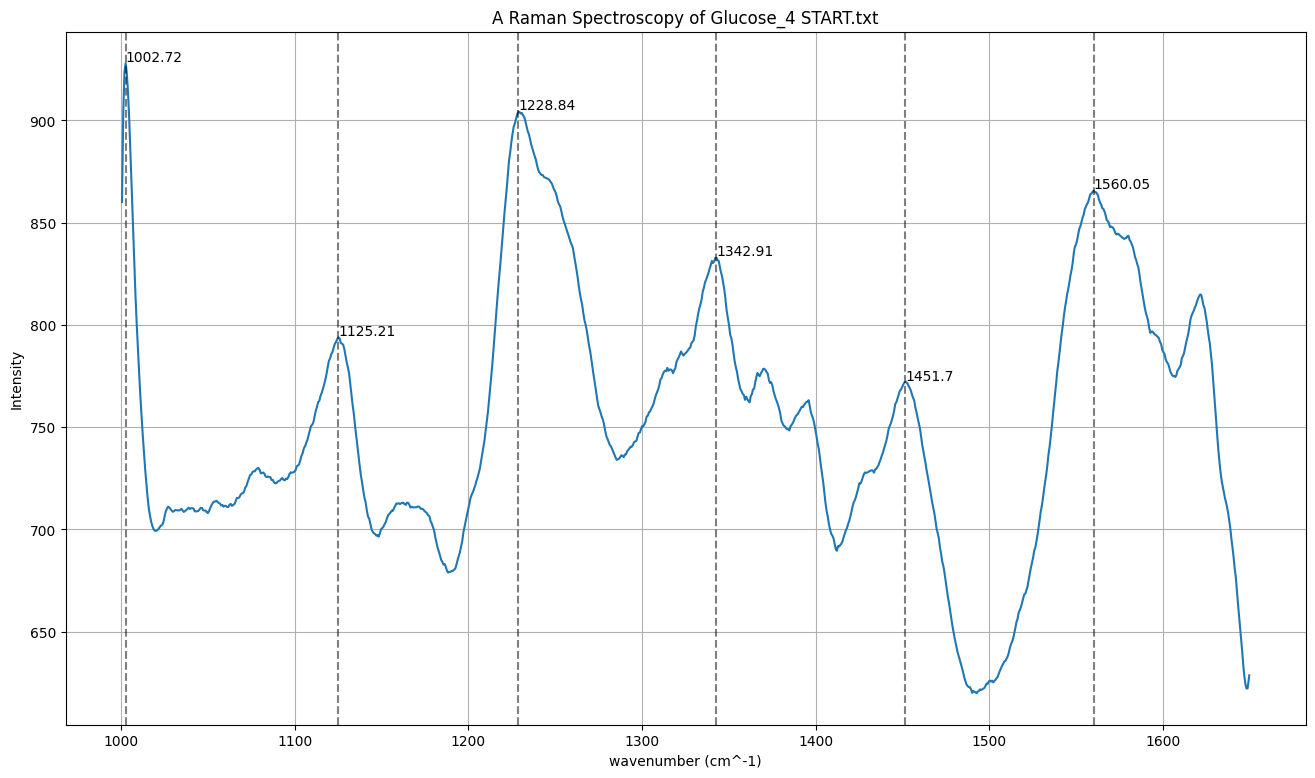

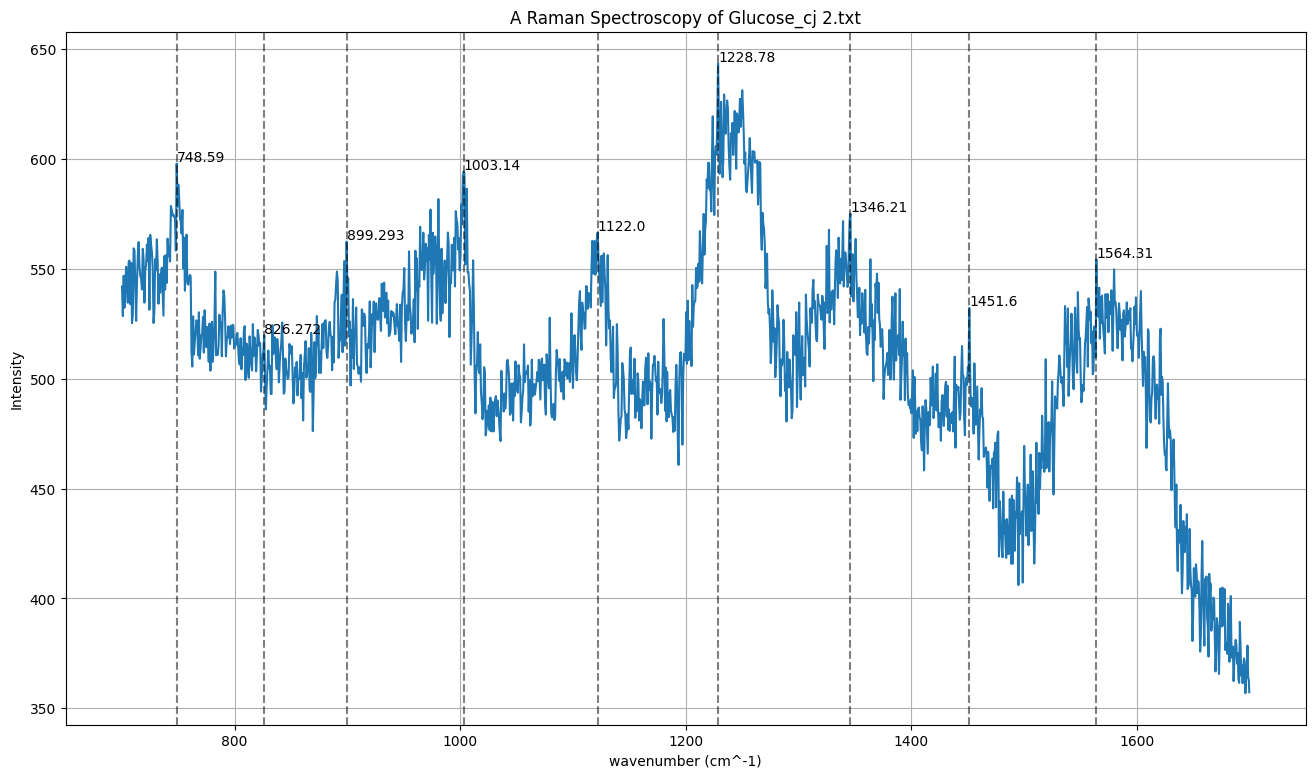

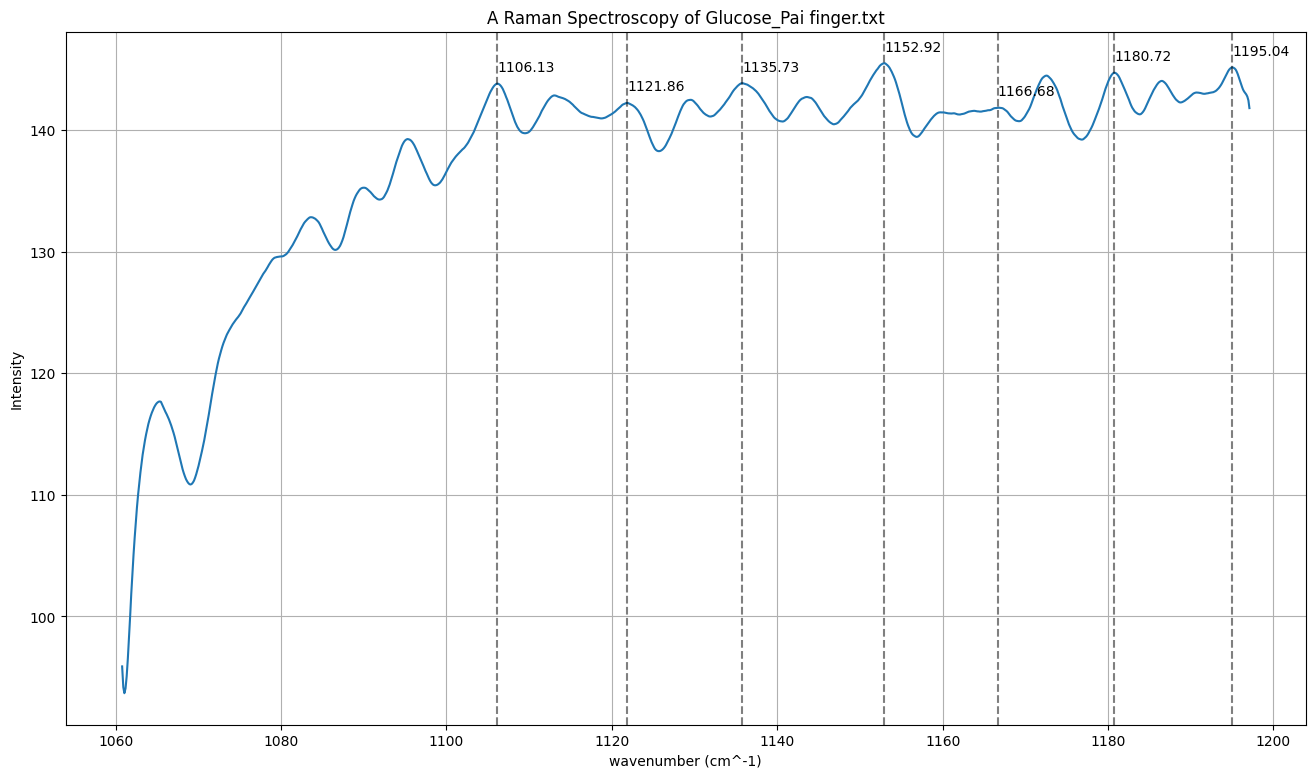

In [3]:
files = glob(f"./data/day1/*.txt")
for file in files:
    plot(file)